In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib
from scipy.integrate import simpson
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# READ INPUT FILES
liptail1=pd.read_csv('theta_rad_liptail.csv',header=None).iloc[1::2, :]
#liptail2=pd.read_csv('theta_rad_liptail_1.csv',header=None).iloc[1::2, :]
#liptail3=pd.read_csv('theta_rad_liptail_2.csv',header=None).iloc[1::2, :]
#liptail4=pd.read_csv('theta_rad_liptail_4.csv',header=None).iloc[1::2, :]
#liptail5=pd.read_csv('theta_rad_liptail_5.csv',header=None).iloc[1::2, :]

type31=pd.read_csv('theta_rad_type3.csv',header=None)
#type32=pd.read_csv('theta_rad_type3_1.csv',header=None)
#type33=pd.read_csv('theta_rad_type3_2.csv',header=None)
#type34=pd.read_csv('theta_rad_type3_4.csv',header=None)
#type35=pd.read_csv('theta_rad_type3_5.csv',header=None)

piezo1=pd.read_csv('theta_rad_pie.csv',header=None)
#piezo2=pd.read_csv('theta_rad_pie_1.csv',header=None)
#piezo3=pd.read_csv('theta_rad_pie_2.csv',header=None)
#piezo4=pd.read_csv('theta_rad_pie_4.csv',header=None)
#piezo5=pd.read_csv('theta_rad_pie_5.csv',header=None)

In [3]:
#Aggr data
#type3tot=pd.concat([type31,type32,type33,type34,type35])
#piezotot=pd.concat([piezo1,piezo2,piezo3,piezo4,piezo5])
#liptailtot=pd.concat([liptail1,liptail2,liptail3,liptail4,liptail5])

type3tot=pd.concat([type31])
piezotot=pd.concat([piezo1])
liptailtot=pd.concat([liptail1])

# Bin averaging
bin_means1, bin_edges1, binnumber1 = stats.binned_statistic(type31[0], type31[1], statistic='mean', bins=200)
#bin_means2, bin_edges2, binnumber2 = stats.binned_statistic(type32[0], type32[1], statistic='mean', bins=200)
#bin_means3, bin_edges3, binnumber3 = stats.binned_statistic(type33[0], type33[1], statistic='mean', bins=200)
#bin_means4, bin_edges4, binnumber4 = stats.binned_statistic(type34[0], type34[1], statistic='mean', bins=200)
#bin_means5, bin_edges5, binnumber5 = stats.binned_statistic(type35[0], type35[1], statistic='mean', bins=200)
bin_meanstot, bin_edgestot, binnumbertot = stats.binned_statistic(type3tot[0], type3tot[1], statistic='mean', bins=200)
bin_meanstot2, bin_edgestot2, binnumbertot2 = stats.binned_statistic(liptailtot[0], liptailtot[1], statistic='mean', bins=200)
bin_width = (bin_edges1[1] - bin_edges1[0])
bin_centers = bin_edges1[1:] - bin_width/2

CHECK RANGE IN PLOT--SHOULD BE CONVEX!!
value chosen=0.9854999999999906


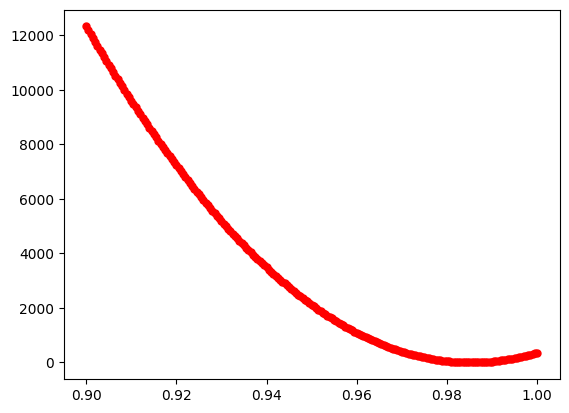

In [4]:
#Normalization (TEST!!)

N_start=0.90
N_incr=0.0005
N_max=1.0

#shift due to averaging
shift=bin_edgestot[1]-bin_edgestot[0]
norm_polar=bin_edgestot[1:]+shift

#lip frac:
frac=0.990
err=[]
errfrac=[]

while (N_start<=N_max):
    frac=N_start
    sinsq=np.multiply(np.sin(norm_polar),np.sin(norm_polar))
    norm_r=np.multiply(bin_meanstot, np.add(1-1*sinsq,frac*sinsq))
    #err_vec=norm_r[norm_polar>np.pi/2]-norm_r[-1]
    err_vec=norm_r[norm_polar>2.0]-norm_r[-1]
    err.append(np.sum(np.multiply(err_vec,err_vec)))
    errfrac.append(N_start)
    #print(N_start,err)
    N_start+=N_incr

print('CHECK RANGE IN PLOT--SHOULD BE CONVEX!!')
fig,ax=plt.subplots()
#plt.hist(samples, bins=50, density=True, histtype='stepfilled',alpha=0.2, label='histogram of data')
plt.plot(errfrac,err, 'ro', label='fitting err', linestyle="None",markersize=5)

frac=errfrac[err.index(min(err))]
print('value chosen='+str(frac))
frac=1.00
#calc, when known frac:
norm_polar=bin_edgestot[1:]-shift/2
#out=np.multiply(yt_avg1_mean, np.add(1-1*np.sin(polar1),frac*np.sin(polar1)))
sinsq=np.multiply(np.sin(norm_polar),np.sin(norm_polar))
norm_r=np.multiply(bin_meanstot, np.add(1-1*sinsq,frac*sinsq))


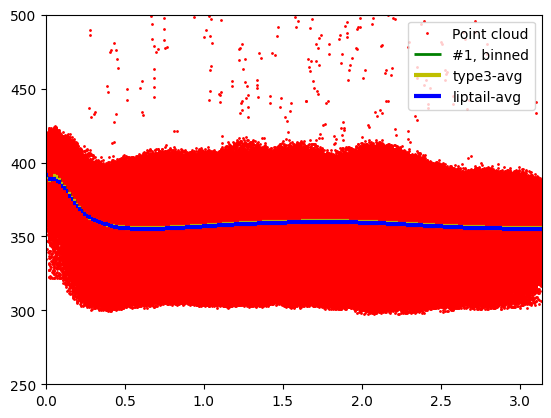

In [5]:
fig,ax=plt.subplots()
#plt.hist(samples, bins=50, density=True, histtype='stepfilled',alpha=0.2, label='histogram of data')
plt.plot(type3tot[0], type3tot[1], 'ro', label='Point cloud', linestyle="None",markersize=1)
plt.hlines(bin_means1, bin_edges1[:-1], bin_edges1[1:], colors='g', lw=2, label='#1, binned')
#plt.hlines(bin_means2, bin_edges2[:-1], bin_edges2[1:], colors='g', lw=2, label='#2, binned')
#plt.hlines(bin_means3, bin_edges3[:-1], bin_edges3[1:], colors='g', lw=2, label='#3, binned')
#plt.hlines(bin_means4, bin_edges4[:-1], bin_edges4[1:], colors='g', lw=2, label='#4, binned')
#plt.hlines(bin_means5, bin_edges5[:-1], bin_edges5[1:], colors='g', lw=2, label='#5, binned')
plt.hlines(bin_meanstot, bin_edgestot[:-1], bin_edgestot[1:], colors='y', lw=3, label='type3-avg')
plt.hlines(bin_meanstot2, bin_edgestot2[:-1], bin_edgestot2[1:], colors='b', lw=3, label='liptail-avg')

#plt.plot(norm_polar,norm_r, 'k-',label='Normalized')
#plt.plot([0,np.pi],[norm_r[-1],norm_r[-1]], label='ref')
plt.legend(fontsize=10)
ax.legend(loc="upper right")
ax.set_xlim([0,np.pi])
ax.set_ylim([250,500])
plt.savefig('samples.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
#gibbs99=[np.percentile(piezo1[0],99),np.percentile(piezo2[0],99),np.percentile(piezo3[0],99)]
#np.std(gibbs99)

In [7]:
#
#Stats on the southern hemisphere
#

K=3 #K-sigma dev.
#south_pole=norm_r[norm_polar > np.pi/2]
south_pole=norm_r[norm_polar > 1.0]
twosig_low=south_pole.mean()-K*south_pole.std()
twosig_high=south_pole.mean()+K*south_pole.std()

#Stats to find "footprint"
#footprint=norm_polar[norm_r<twosig_low][-1]

#Stats to find "minimum"
#mini=norm_polar[norm_r==min(norm_r)]

#
# Binning piezo
#
cntpie, binpie = np.histogram(piezotot[0],bins=100,density=True)
cntliptail, binliptail = np.histogram(liptailtot[0],bins=100,density=True)
gibbs99=np.percentile(piezotot[0],99)
gibbs95=np.percentile(piezotot[0],95)

In [8]:
gibbs99=np.percentile(piezotot[0],99)

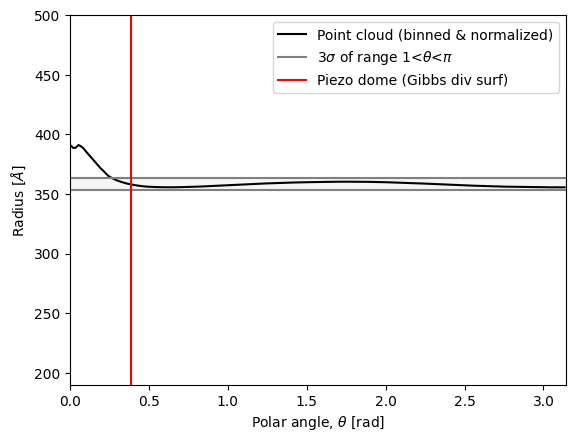

In [9]:
fig,ax=plt.subplots()
plt.xlabel(r"Polar angle, $\theta$ [rad]")
plt.ylabel("Radius [$\AA$]")
ax.plot(norm_polar,norm_r,label='Point cloud (binned & normalized)',color='k')

ax.set_ylim([190,500])
ax.plot([0,math.pi],[twosig_low,twosig_low],label=r'3$\sigma$ of range 1<$\theta$<$\pi$',color='gray')
ax.plot([0,math.pi],[twosig_high,twosig_high],color='gray')

rect1 = matplotlib.patches.Rectangle((0.0,twosig_low), math.pi, 2*3*south_pole.std(), color='whitesmoke')
ax.add_patch(rect1)

#plt.plot([mini,mini],[-1,1000],label='Minimum well',color='purple')
plt.plot([gibbs99,gibbs99],[-1,1000],label='Piezo dome (Gibbs div surf)',color='red')
#plt.plot([footprint,footprint],[-1,1000],label='Piezo footprint',color='orange')

ax.set_xlim([0,math.pi])

ax.legend(loc="upper right")

fig.savefig('profile_avg.png', format='png', dpi=300, bbox_inches='tight')

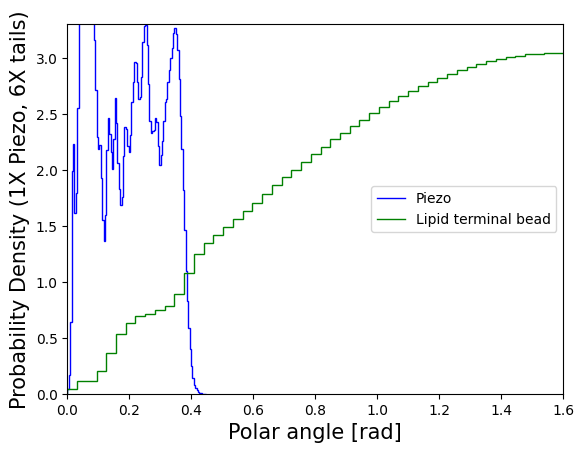

In [10]:
plt.stairs(cntpie, binpie,label='Piezo',color='blue')

#plt.plot([mini,mini],[-1,1000],label='Minimum well',color='purple')
#plt.plot([gibbs99,gibbs99],[-1,1000],label='Piezo dome (Gibbs div surf)',color='red')
#plt.plot([footprint,footprint],[-1,1000],label='Piezo footprint',color='orange')

plt.stairs(cntliptail*6, binliptail,label='Lipid terminal bead',color='g')

plt.legend(loc='center right')
plt.ylim([0,3.3])
plt.xlim([0,1.6])

plt.xlabel('Polar angle [rad]',size=15)
plt.ylabel('Probability Density (1X Piezo, 6X tails)',size=15)

plt.savefig('profile_histo.png', format='png', dpi=300, bbox_inches='tight')

In [11]:
# Useful routine:
def find_nearest_idx(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx

In [12]:
# PROFILE PHOTO, POLAR TO RECT COORDs
xj=np.zeros(len(norm_r))
yj=np.zeros(len(norm_r))
sph_xj=[]
for j in range(len(norm_r)):
    xj[j]=norm_r[j]*np.sin(norm_polar[j])
    yj[j]=norm_r[j]*np.cos(norm_polar[j])
    if (norm_polar[j] <= gibbs99):
        sph_xj.append([xj[j],yj[j]])
        sph_xj.append([-1*xj[j],yj[j]])


#Gibbs99, dome
radius=norm_r[find_nearest_idx(norm_polar,gibbs99)]
polar=gibbs99
red_x=radius*np.sin(polar)
red_y=radius*np.cos(polar)

#Footprint
#radius=norm_r[find_nearest_idx(norm_polar,footprint)]
#polar=footprint
#orange_x=radius*np.sin(polar)
#orange_y=radius*np.cos(polar)

#Minimum
#radius=norm_r[find_nearest_idx(norm_polar,mini)]
#polar=mini
#purple_x=radius*np.sin(polar)
#purple_y=radius*np.cos(polar)

In [13]:
#draw the vesicle
norm_r[-1]
ang=np.linspace(0,2*np.pi,100)
xk=norm_r[-1]*np.sin(ang)
yk=norm_r[-1]*np.cos(ang)

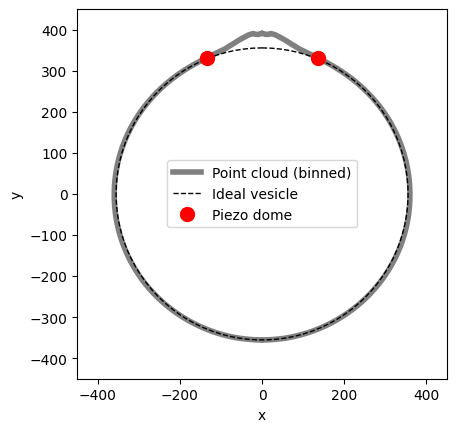

In [14]:
# SHOW PROFILE PIC
fig,ax=plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
#ax.plot(polar1,out2,label='run avg trend (corrected)')
plt.ylim([-450,450])
plt.xlim([-450,450])
ax.plot(xj,yj,label='Point cloud (binned)',linewidth=4,color='gray')
ax.plot(-1*xj,yj,linewidth=4,color='gray')
ax.plot(xk,yk,label='Ideal vesicle',linewidth=1,color='black',linestyle='--')

#dots
#ax.plot(purple_x,purple_y,label='Minimum well',color='purple',marker='o',markersize=10,linestyle="None")
#ax.plot(-1*purple_x,purple_y,color='purple',marker='o',markersize=10,linestyle="None")
ax.plot(red_x,red_y,label='Piezo dome',color='red',marker='o',markersize=10,linestyle="None")
ax.plot(-1*red_x,red_y,color='red',marker='o',markersize=10,linestyle="None")
#ax.plot(orange_x,orange_y,label='Piezo footprint',color='orange',marker='o',markersize=10,linestyle="None")
#ax.plot(-1*orange_x,orange_y,color='orange',marker='o',markersize=10,linestyle="None")


plt.legend()
plt.gca().set_aspect('equal')

plt.savefig('profile_vesicle.png', format='png', dpi=300, bbox_inches='tight')

In [15]:
#
# SECTION WHERE WE FIT THE CIRCLE(S)
#

In [16]:
from circle_fit import standardLSQ
import circle_fit
points = sph_xj
xc, yc, RP, sigma = standardLSQ(points)
xc, yc, RP, sigma

(-1.5725334515186292e-05,
 217.2512726748321,
 168.86869566258167,
 4.138874410068132)

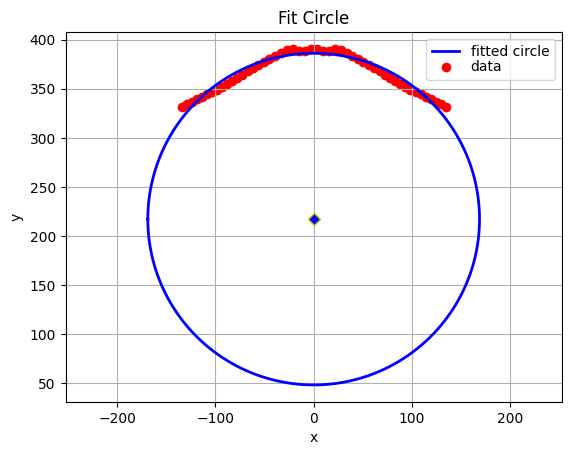

In [17]:
circle_fit.plot_data_circle(points, xc, yc, RP)

Optimized Circle Parameters:
Center (xc, yc): 0 186.82255983919373
Radius (r): 197.96847141172034
Start Angle: -6.283185307179586
End Angle: 6.283185307179586


(-300.0, 300.0)

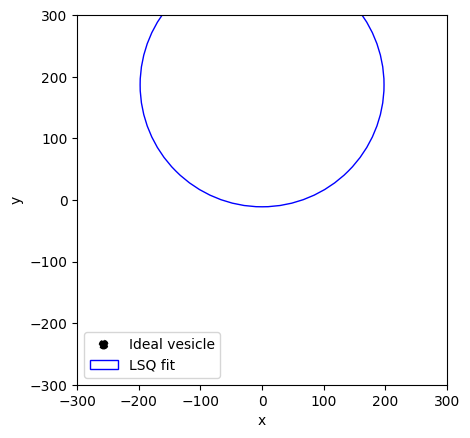

In [18]:
# CONSTRAINED FITTING TO MATCH THE BOUNDARY, 
# USING scipy.optimize
# see also this https://stackoverflow.com/questions/67162588/scipy-curve-fit-with-constraint-and-fixing-points

import numpy as np
from scipy.optimize import minimize

def ConstraintEnd(params):
    yc, r, theta_start, theta_end = params
    return red_x**2 + (red_y-yc)**2 - r**2

def circle_residuals(params, x, y, x_fixed, y_fixed):
    # Residuals function to minimize
    yc, r, theta_start, theta_end = params
    residuals = []
    for xi, yi in zip(x, y):
        # Check if the point lies within the desired arc
        theta = np.arctan2(yi - yc, xi)
        if theta_start <= theta <= theta_end:
            residual = xi ** 2 + (yi - yc) ** 2 - r ** 2
            residuals.append(residual)
    # Constraint to go through the fixed point
    xc_fixed = x_fixed
    yc_fixed = y_fixed
    fixed_constraint = (xc_fixed ** 2) + (yc_fixed - yc) ** 2 - r ** 2
    residuals.append(fixed_constraint)
    return np.sum(np.array(residuals) ** 2)  # Return sum of squared residuals

def fit_circle(points):
    # Extract x and y coordinates from points array
    x_data = points[:, 0]
    y_data = points[:, 1]

    # Given data
    x_fixed = x_data[-1]
    y_fixed = y_data[-1]
    x = x_data[1:]
    y = y_data[1:]

    # Initial guess for circle parameters
    yc_guess = np.mean(y)
    r_guess = np.sqrt((x[0]) ** 2 + (y[0] - yc_guess) ** 2)
    theta_start_guess = -2*np.pi  # Starting angle of the arc in radians
    theta_end_guess = 2*np.pi  # Ending angle of the arc in radians

    # Optimize circle parameters
    initial_params = [yc_guess, r_guess, theta_start_guess, theta_end_guess]
    cons = [{'type':'eq', 'fun': ConstraintEnd}]
    result = minimize(circle_residuals, initial_params, args=(x, y, x_fixed, y_fixed),constraints=cons)
    optimized_params = result.x

    # Extract optimized circle parameters
    yc_optimized, r_optimized, theta_start_optimized, theta_end_optimized = optimized_params

    print("Optimized Circle Parameters:")
    print("Center (xc, yc):", 0, yc_optimized)
    print("Radius (r):", r_optimized)
    print("Start Angle:", theta_start_optimized)
    print("End Angle:", theta_end_optimized)
    return 0.0, yc_optimized, r_optimized

points = np.vstack(points)
xc_optimized, yc_optimized, r_optimized = fit_circle(points)

xc_cnlsq=xc_optimized
yc_cnlsq=yc_optimized
r_cnlsq=r_optimized

fig,ax=plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(points[:,0],points[:,1],label='Ideal vesicle',linewidth=1,color='black',linestyle='--')

circ1=matplotlib.patches.Circle([xc_optimized, yc_optimized],r_optimized,fill=False,color='blue',label='LSQ fit')
ax.add_patch(circ1)
plt.legend()
plt.gca().set_aspect('equal')
plt.xlim([-300,300])
plt.ylim([-300,300])

In [19]:
def get_x(lst):
    return list(list(zip(*lst))[0])
def get_y(lst):
    return list(list(zip(*lst))[1])

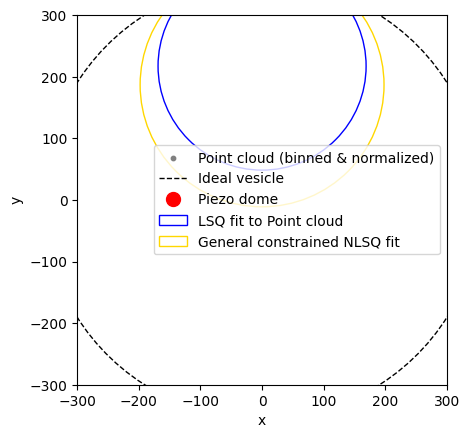

In [20]:
# SHOW PROFILE PIC
fig,ax=plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
#ax.plot(polar1,out2,label='run avg trend (corrected)')
plt.ylim([-100,300])
plt.xlim([-200,200])
ax.scatter(get_x(points),get_y(points),label='Point cloud (binned & normalized)',s=10,color='gray',marker='o')
#ax.plot(-1*xj,yj,linewidth=4,color='gray')
ax.plot(xk,yk,label='Ideal vesicle',linewidth=1,color='black',linestyle='--')

#dots
#ax.plot(purple_x,purple_y,label='Minimum well',color='purple',marker='o',markersize=10,linestyle="None")
#ax.plot(-1*purple_x,purple_y,color='purple',marker='o',markersize=10,linestyle="None")
ax.plot(red_x,red_y,label='Piezo dome',color='red',marker='o',markersize=10,linestyle="None")
ax.plot(-1*red_x,red_y,color='red',marker='o',markersize=10,linestyle="None")
#ax.plot(orange_x,orange_y,label='Piezo footprint',color='orange',marker='o',markersize=10,linestyle="None")
#ax.plot(-1*orange_x,orange_y,color='orange',marker='o',markersize=10,linestyle="None")

circ1=matplotlib.patches.Circle([xc,yc],RP,fill=False,color='blue',label='LSQ fit to Point cloud')
circ2=matplotlib.patches.Circle([xc_cnlsq,yc_cnlsq],r_cnlsq,fill=False,color='gold',label='General constrained NLSQ fit')
#circ2=matplotlib.patches.Circle([xc,yc],r*1.02,fill=False,color='green',label='LSQ fit to Point cloud')
ax.add_patch(circ1)
ax.add_patch(circ2)
plt.legend()
plt.ylim([-300,300])
plt.xlim([-300,300])
plt.gca().set_aspect('equal')

In [21]:
# Piezo dome area, Ap1:

def find_nearest_idx(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx

#
# FIND AREAS VIA. INTEGRATION
#
print('# AREAS BY INTEGRATION:')

j=0
sum=0
max=find_nearest_idx(norm_polar,gibbs99)

while(j<=max):
    # base radius of spherical cap,
    h1 = norm_r[j]*(1-math.cos(norm_polar[j]))
    rb1 = math.sqrt( h1*(2*norm_r[j]-h1) )
    dang=(norm_polar[j+1]-norm_polar[j])*norm_r[j]
    #sum+=2*np.pi*norm_r[j]*dang
    #sum+=np.pi*(norm_r[j]+norm_r[j+1])*dang
    sum+=2*np.pi*rb1*dang
    j+=1

area_dome=sum/100
print('Piezo dome area = '+str(area_dome)+' nm^2')

j=0
sum=0
max=find_nearest_idx(norm_polar,footprint)

while(j<=max):
    # base radius of spherical cap,
    h1 = norm_r[j]*(1-math.cos(norm_polar[j]))
    rb1 = math.sqrt( h1*(2*norm_r[j]-h1) )
    dang=(norm_polar[j+1]-norm_polar[j])*norm_r[j]
    #sum+=2*np.pi*norm_r[j]*dang
    #sum+=np.pi*(norm_r[j]+norm_r[j+1])*dang
    sum+=2*np.pi*rb1*dang
    j+=1

area_footprint=sum/100
print('Piezo footprint area = '+str(area_footprint)+' nm^2')
print('Piezo footprint area (excl. dome) = '+str(area_footprint-area_dome)+' nm^2')

j=0
sum=0
max=find_nearest_idx(norm_polar,mini)

while(j<=max):
    # base radius of spherical cap,
    h1 = norm_r[j]*(1-math.cos(norm_polar[j]))
    rb1 = math.sqrt( h1*(2*norm_r[j]-h1) )
    dang=(norm_polar[j+1]-norm_polar[j])*norm_r[j]
    #sum+=2*np.pi*norm_r[j]*dang
    #sum+=np.pi*(norm_r[j]+norm_r[j+1])*dang
    sum+=2*np.pi*rb1*dang
    j+=1

print('Minimum area = '+str(sum/100)+' nm^2')

#
# FIND AREAS BY PROJECTION TO VESICLE 
#
print('# AREAS BY PROJECTION TO VESICLE:')
#projected spherical cap area, in terms of (r,theta): A=2*pi*r^2*(1-cos theta)
spherical_cap_area=2*math.pi*norm_r[-1]*norm_r[-1]*(1-math.cos(gibbs99))
spherical_cap_area=2*math.pi*norm_r[find_nearest_idx(norm_polar,gibbs99)]*norm_r[find_nearest_idx(norm_polar,gibbs99)]*(1-math.cos(norm_polar[find_nearest_idx(norm_polar,gibbs99)]))
print('Piezo dome area, projected spherical cap =',spherical_cap_area/100,'nm^2')

#h1 = norm_r[find_nearest_idx(norm_polar,gibbs99)]*(1-math.cos(norm_polar[find_nearest_idx(norm_polar,gibbs99)]))
#rb1 = math.sqrt( h1*(2*norm_r[find_nearest_idx(norm_polar,gibbs99)]-h1) )
#replace by:
#h1 = RL - d1
#rb1 = sqrt( h1*(2RL-h1))
d1=red_y-yc_cnlsq
h1= r_cnlsq - d1
rb1=math.sqrt(h1*(2*r_cnlsq-h1))
alpha = np.arcsin(rb1/RP)
alpha_cnlsq = np.arcsin(rb1/r_cnlsq)
print('Base radius of spherical cap at dome boundary, r_b =',rb1/10,'nm')
print('Base area of spherical cap at dome boundary =',np.pi*rb1*rb1/100,'nm^2')
print('# ALPHA,R_P ESTIMATES')
print('##R_P (circle_fit) =',RP/10,'nm')
print('##alpha (circle_fit) = arcsin( r_b / R_P ) = ',alpha,'rad = ',alpha/math.pi*180,'deg')
print('R_P (curve_fit) =',r_cnlsq/10,'nm')
print('alpha (curve_fit) = arcsin( r_b / R_P ) = ',alpha_cnlsq,'rad = ',alpha_cnlsq/math.pi*180,'deg')

# AREAS BY INTEGRATION:
Piezo dome area = 643.7131257554812 nm^2


NameError: name 'footprint' is not defined

In [ ]:
#
# INTEGRATION ALGORITHM TEST CASE: SOUTHERN HEMISPHERE
#
def find_nearest_idx(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx

#radius=1

j=find_nearest_idx(norm_polar,np.pi/2)
sum=0
max=find_nearest_idx(norm_polar,np.pi)

while(j<max):
    # base radius of spherical cap,
    h1 = norm_r[j]*(1-math.cos(norm_polar[j]))
    rb1 = math.sqrt( h1*(2*norm_r[j]-h1) )
    dang=(norm_polar[j+1]-norm_polar[j])*norm_r[j]
    #sum+=2*np.pi*norm_r[j]*dang
    #sum+=np.pi*(norm_r[j]+norm_r[j+1])*dang
    sum+=2*np.pi*rb1*dang
    j+=1

area_dome=sum/100
print('Southern hemisphere area = '+str(area_dome)+' nm^2')
hemi_area=4*np.pi*norm_r[-1]*norm_r[-1]/2
print('Ref value ( 4*pi*R_v^2 * 0.5)=',hemi_area/100,'nm^2')
err=np.abs(hemi_area/100-area_dome)
print('Error:',err,'\nRel. err (%):',err/(hemi_area/100)*100)


In [ ]:
#
# Eccentricity
#
# "For an ellipse, a and b are the lengths of the semi-major and semi-minor axes respectively."--https://byjus.com/maths/eccentricity/#Eccentric%20Meaning%20in%20Geometry
# e= sqrt( 1 - b^2/a^b )

#find_nearest_idx(norm_polar,mini)
#radius=norm_r[find_nearest_idx(norm_polar,mini)]
b=float(norm_r[find_nearest_idx(norm_polar,np.pi/2)])
#a=float(norm_r[find_nearest_idx(norm_polar,mini)])
a=float(norm_r[-1])
ecc=np.sqrt( 1-np.multiply(a,a)/np.multiply(b,b) )
print('Eccentricity, e =',ecc,' a/b ratio: ',a/b)